### Reading the data - Data preprocessing

In [399]:
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
# read data/train image folder
# read gray scale image
train_A = []
train_B = []
train_C = []
test_A = []
test_B = []
test_C = []
# read data/train/A, data/train/B, data/train/C and store them in train_A, train_B, train_C respectively
for file in glob.glob("data/train/A/*.png"):
    train_A.append((cv2.imread(file,cv2.IMREAD_GRAYSCALE)).reshape(-1,1)/255)
for file in glob.glob("data/train/B/*.png"):
    train_B.append(cv2.imread(file,cv2.IMREAD_GRAYSCALE).reshape(-1,1)/255)
for file in glob.glob("data/train/C/*.png"):
    train_C.append(cv2.imread(file,cv2.IMREAD_GRAYSCALE).reshape(-1,1)/255)

# read data/test/A, data/test/B, data/test/C and store them in test_A, test_B, test_C respectively
for file in glob.glob("data/test/A/*.png"):
    test_A.append(cv2.imread(file,cv2.IMREAD_GRAYSCALE).reshape(-1,1)/255)
for file in glob.glob("data/test/B/*.png"):
    test_B.append(cv2.imread(file,cv2.IMREAD_GRAYSCALE).reshape(-1,1)/255)
for file in glob.glob("data/test/C/*.png"):
    test_C.append(cv2.imread(file,cv2.IMREAD_GRAYSCALE).reshape(-1,1)/255)

In [400]:
# create X_train, X_test and Y_train, Y_test
X_train = np.array(train_A + train_B + train_C)
X_test = np.array(test_A + test_B + test_C)
Y_train = np.array([1]*len(train_A) + [-1]*len(train_B) + [-1]*len(train_C))
Y_test = np.array([1]*len(test_A) + [-1]*len(test_B) + [-1]*len(test_C))


In [401]:
X_train[0].shape

(784, 1)

### Question 5:
We will implement the SGD algorithm to solve specific problems.


In [402]:
def logistic_loss_gradient(X_i, Y_i, w):
    # multiply weight vector with image vector
    return -(Y_i*X_i*np.exp(-Y_i*np.dot(w.T,X_i)))/(1+np.exp(-Y_i*np.dot(w.T,X_i)))
def logistic_loss(X, Y, w):
    loss = 0
    for i in range(len(X)):
        loss += np.log(1+np.exp(-Y[i]*np.dot(w.T,X[i])))
    return float(loss/len(X))
 # define OLS loss gradient
def OLS_loss_gradient(X_i, Y_i, w):
    return -2*(Y_i-np.dot(w.T,X_i))*X_i
def OLS_loss(X, Y, w):
    loss = 0
    for i in range(len(X)):
        loss += (Y[i]-np.dot(w.T,X[i]))**2
    return float(loss/len(X))
# define 0-1 loss gradient
def zero_one_loss_gradient(X_i, Y_i, w):
    return -Y_i*X_i if Y_i*np.dot(w.T,X_i) <= 0 else 0
def zero_one_loss(X, Y, w):
    loss = 0
    for i in range(len(X)):
        loss += 1 if Y[i]*np.dot(w.T,X[i]) <= 0 else 0
    return float(loss/len(X))
# define perceptron loss gradient
def perceptron_weight_gradient(X_i, Y_i, w,b):
    return -Y_i*X_i if Y_i*(np.dot(w.T,X_i)+b) <= 0 else 0
def perceptron_bias_gradient(X_i, Y_i, w,b):
    return -Y_i if Y_i*(np.dot(w.T,X_i)+b) <= 0 else 0
def perceptron_loss(X, Y, w,b):
    loss = 0
    for i in range(len(X)):
        loss += 1 if Y[i]*(np.dot(w.T,X[i])+b) < 0 else 0
    return float(loss/len(X))

### Logistic error

100%|██████████| 12000/12000 [00:08<00:00, 1418.53it/s]


Training error:  0.1903635869255105
Testing error:  0.2043718375283696


100%|██████████| 12000/12000 [00:07<00:00, 1516.54it/s]


Training error:  0.10821245345672939
Testing error:  0.1664571110251724


100%|██████████| 12000/12000 [00:07<00:00, 1534.94it/s]


Training error:  0.47196505523034027
Testing error:  0.9220418006238263


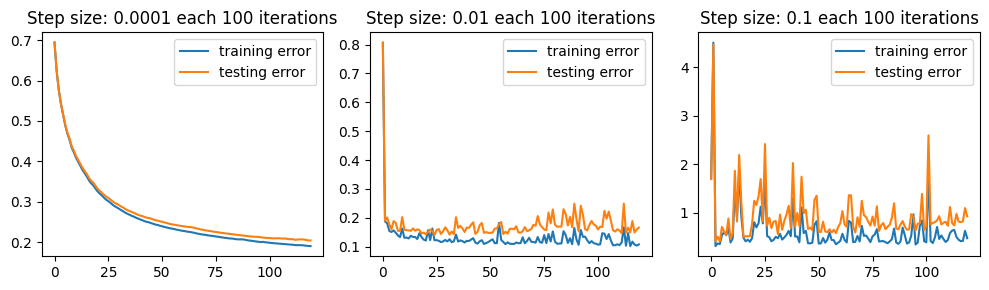

In [403]:
from tqdm import tqdm 

# define well crafted step sizes for our SGD
step_sizes = [0.0001,0.01,0.1]
subplots = len(step_sizes) 
fig, axs = plt.subplots(1,subplots)
# choose size of figure
fig.set_size_inches(10, 3)
# do SGD for different number of iterations
nbr_of_iterations = 12000
for j in range(subplots):
    step_size = step_sizes[j]
    w = np.zeros_like(X_train[0])
    train_error = []
    test_error = []
    for i in tqdm(range(nbr_of_iterations)) :
        # choose a random index
        index = np.random.randint(0,len(X_train))
        # update weight using SGD
        w = w - step_size*logistic_loss_gradient(X_train[index],Y_train[index],w)
        if i% 100 == 0 : # compute training and testing error each 100 iterations
            train_error.append(logistic_loss(X_train,Y_train,w))
            test_error.append(logistic_loss(X_test,Y_test,w))
            
    print("Training error: ",train_error[-1])
    print("Testing error: ",test_error[-1])
    # plot both training and testing error on the same figure in first row    
    axs[j].plot(train_error, label="training error")
    axs[j].set_title("Step size: " + str(step_size)+ " each 100 iterations")
    # add legend
    axs[j].plot(test_error, label="testing error")
    axs[j].legend()
fig.tight_layout()
        

### Perceptron error

100%|██████████| 12000/12000 [00:05<00:00, 2026.05it/s]


Training error:  0.067
Testing error:  0.07466666666666667


100%|██████████| 12000/12000 [00:05<00:00, 2072.49it/s]


Training error:  0.043166666666666666
Testing error:  0.04666666666666667


100%|██████████| 12000/12000 [00:06<00:00, 1943.24it/s]


Training error:  0.09566666666666666
Testing error:  0.10266666666666667


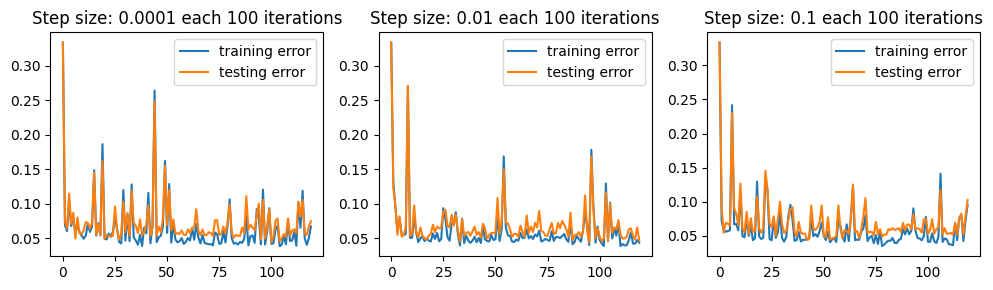

In [404]:
# define well crafted step sizes for our SGD
step_sizes = [0.0001,0.01,0.1]
subplots = len(step_sizes) 
fig, axs = plt.subplots(1,subplots)
# choose size of figure
fig.set_size_inches(10, 3)
# do SGD for different number of iterations
nbr_of_iterations = 12000
for j in range(subplots):
    step_size = step_sizes[j]
    w = np.zeros_like(X_train[0])
    b = 0
    train_error = []
    test_error = []
    for i in tqdm(range(nbr_of_iterations)) :
        # choose a random index
        index = np.random.randint(0,len(X_train))
        # update weight using SGD
        w = w - step_size*perceptron_weight_gradient(X_train[index],Y_train[index],w,b)
        if i% 100 == 0 : # compute training and testing error each 100 iterations
            train_error.append(perceptron_loss(X_train,Y_train,w,b))
            test_error.append(perceptron_loss(X_test,Y_test,w,b))
            
    print("Training error: ",train_error[-1])
    print("Testing error: ",test_error[-1])
    # plot both training and testing error on the same figure in first row    
    axs[j].plot(train_error, label="training error")
    axs[j].set_title("Step size: " + str(step_size)+ " each 100 iterations")
    # add legend
    axs[j].plot(test_error, label="testing error")
    axs[j].legend()
fig.tight_layout()

### OLS error

100%|██████████| 12000/12000 [00:06<00:00, 1897.31it/s]


Training error:  0.18310174336559468
Testing error:  0.20416526138718186


  3%|▎         | 401/12000 [00:00<00:06, 1663.46it/s]C:\Users\Ahouz\AppData\Local\Temp\ipykernel_29216\2311388809.py:15: RuntimeWarning: overflow encountered in add
  loss += (Y[i]-np.dot(w.T,X[i]))**2
C:\Users\Ahouz\AppData\Local\Temp\ipykernel_29216\2311388809.py:15: RuntimeWarning: overflow encountered in square
  loss += (Y[i]-np.dot(w.T,X[i]))**2
  9%|▉         | 1101/12000 [00:00<00:06, 1639.35it/s]C:\Users\Ahouz\AppData\Local\Temp\ipykernel_29216\2311388809.py:11: RuntimeWarning: overflow encountered in multiply
  return -2*(Y_i-np.dot(w.T,X_i))*X_i
C:\Users\Ahouz\AppData\Local\Temp\ipykernel_29216\2311388809.py:11: RuntimeWarning: invalid value encountered in multiply
  return -2*(Y_i-np.dot(w.T,X_i))*X_i
100%|██████████| 12000/12000 [00:05<00:00, 2104.39it/s]


Training error:  nan
Testing error:  nan


100%|██████████| 12000/12000 [00:05<00:00, 2114.96it/s]


Training error:  nan
Testing error:  nan


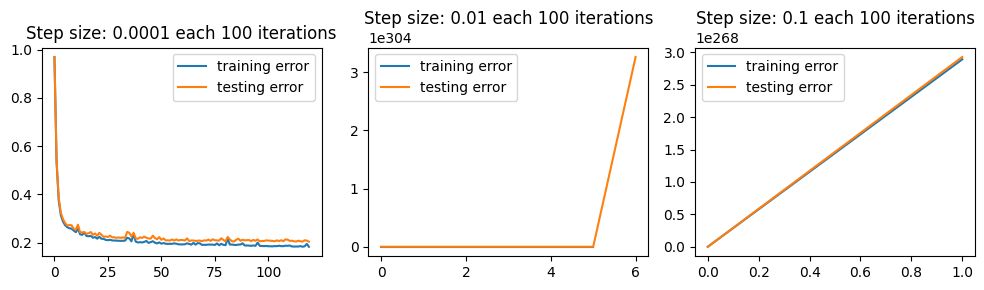

In [420]:
# define well crafted step sizes for our SGD
step_sizes = [0.0001,0.01,0.1]
subplots = len(step_sizes) 
fig, axs = plt.subplots(1,subplots)
# choose size of figure
fig.set_size_inches(10, 3)
# do SGD for different number of iterations
nbr_of_iterations = 12000
for j in range(subplots):
    step_size = step_sizes[j]
    w = np.zeros_like(X_train[0])
    train_error = []
    test_error = []
    for i in tqdm(range(nbr_of_iterations)) :
        # choose a random index
        index = np.random.randint(0,len(X_train))
        # update weight using SGD
        w = w - step_size*OLS_loss_gradient(X_train[index],Y_train[index],w)
        if i% 100 == 0 : # compute training and testing error each 100 iterations
            train_error.append(OLS_loss(X_train,Y_train,w))
            test_error.append(OLS_loss(X_test,Y_test,w))
            
    print("Training error: ",train_error[-1])
    print("Testing error: ",test_error[-1])
    # plot both training and testing error on the same figure in first row    
    axs[j].plot(train_error, label="training error")
    axs[j].set_title("Step size: " + str(step_size)+ " each 100 iterations")
    # add legend
    axs[j].plot(test_error, label="testing error")
    axs[j].legend()
fig.tight_layout()

## Question 5:

### Logistic Weights

100%|██████████| 10000/10000 [00:00<00:00, 31309.16it/s]


4


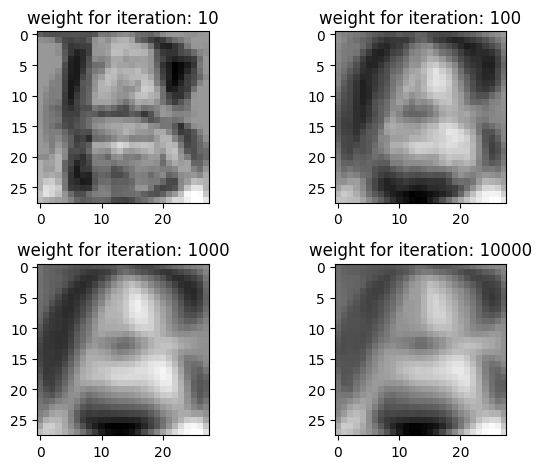

In [406]:
step_size = 0.0001  
nbr_of_iterations = 10000
set_iterations = [10,100,1000,10000]
weights = []
w = np.zeros_like(X_train[0])

for i in tqdm(range(1,nbr_of_iterations+1)) :
    #choose random sample from X_train and Y_train
    index = np.random.randint(0,len(X_train))
    # update weight using SGD 
    w = w - step_size*logistic_loss_gradient(X_train[index], Y_train[index], w)   
    if i in set_iterations:
        weights.append(w)
print(len(weights))
# plot the 4 weights as images in 2*2 grid
fig, axs = plt.subplots(2, 2)
for i in range(2):
    for j in range(2):
        axs[i,j].imshow(weights[i*2+j].reshape(28,28), cmap='gray')
        axs[i,j].set_title("weight for iteration: " + str(set_iterations[i*2+j]))
fig.tight_layout() 

### OLS loss :

100%|██████████| 10000/10000 [00:00<00:00, 54335.43it/s]


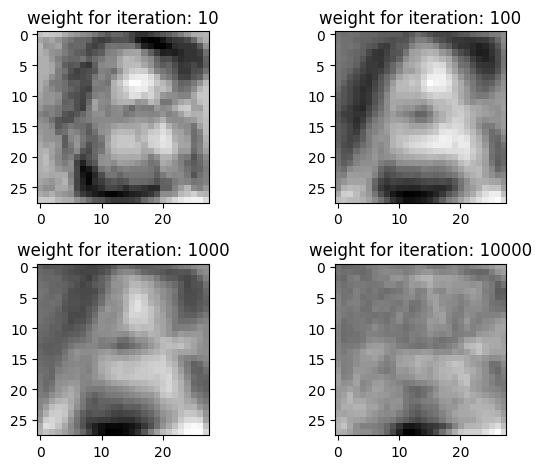

In [407]:
step_size = 0.0001  
nbr_of_iterations = 10000
set_iterations = [10,100,1000,10000]
weights = []
w = np.zeros_like(X_train[0])
for i in tqdm(range(1,nbr_of_iterations+1)) :
    index = np.random.randint(0,len(X_train))
    w = w - step_size*OLS_loss_gradient(X_train[index], Y_train[index], w)   
    if i in set_iterations:
        weights.append(w)
# plot the 4 weights as images in 2*2 grid
fig, axs = plt.subplots(2, 2)
for i in range(2):
    for j in range(2):
        axs[i,j].imshow(weights[i*2+j].reshape(28,28), cmap='gray')
        axs[i,j].set_title("weight for iteration: " + str(set_iterations[i*2+j]))
fig.tight_layout() 

### Perceptron  loss :

100%|██████████| 10000/10000 [00:00<00:00, 34357.69it/s]


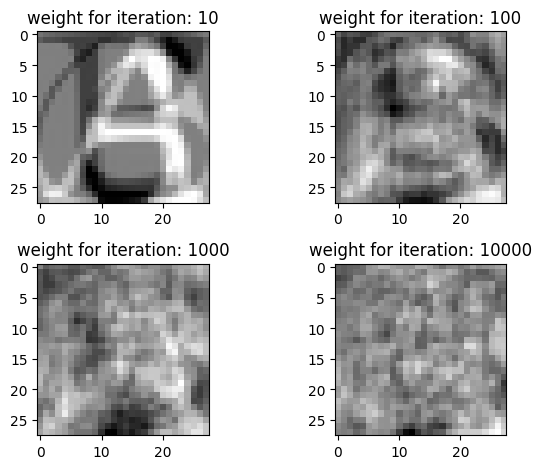

In [408]:
step_size = 0.0001  
nbr_of_iterations = 10000
set_iterations = [10,100,1000,10000]
weights = []
biases = []
w = np.zeros_like(X_train[0])
b = 0
# SGD for perceptron
for i in tqdm(range(1,nbr_of_iterations+1)) :
    index = np.random.randint(0,len(X_train))  
    # vary w,b simultaneously
    w,b = w - step_size*perceptron_weight_gradient(X_train[index], Y_train[index], w,b),b - step_size*perceptron_bias_gradient(X_train[index], Y_train[index], w,b)
    if i in set_iterations:
        weights.append(w)
        biases.append(b)
# plot the 4 weights as images in 2*2 grid
fig, axs = plt.subplots(2, 2)
for i in range(2):
    for j in range(2):
        axs[i,j].imshow(weights[i*2+j].reshape(28,28), cmap='gray')
        axs[i,j].set_title("weight for iteration: " + str(set_iterations[i*2+j]))
fig.tight_layout()  

## Question 6 : KNN

### Definition

K-nearest neighbors classifier takes on  the label of the majority of its k nearest neighbors. The distance between two points is the Euclidean distance. The algorithm is as follows : 
1. For each test point, find the k nearest neighbors in the training set using the Euclidean distance
2. Assign the label of the majority of the k nearest neighbors to the test point.
 
  
 

In [409]:
X_test.shape

(750, 784, 1)

In [410]:
# convert the data to 1D array
X_train_1D = X_train.reshape(X_train.shape[0], -1)
X_test_1D = X_test.reshape(X_test.shape[0], -1)

In [411]:
X_train_1D.shape

(6000, 784)

In [412]:
X_test_1D.shape

(750, 784)

### Plot of training and test error

In [413]:
# apply KNN for certain k 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def apply_knn(k,X_train,Y_train,X_test,Y_test):
    # apply KNN and return training and testing error
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    Y_train_pred = knn.predict(X_train)
    Y_test_pred = knn.predict(X_test)
    train_error = 1-accuracy_score(Y_train, Y_train_pred)
    test_error = 1-accuracy_score(Y_test, Y_test_pred)
    return train_error,test_error
    


In [414]:
# test the function for multiple k values
train_error = []
test_error = []
max_k = 10 # square root of number of training samples
for k in tqdm(range(1,max_k)):
    train_error_k,test_error_k = apply_knn(k,X_train_1D,Y_train,X_test_1D,Y_test)
    train_error.append(train_error_k)
    test_error.append(test_error_k)
    

100%|██████████| 9/9 [00:08<00:00,  1.12it/s]


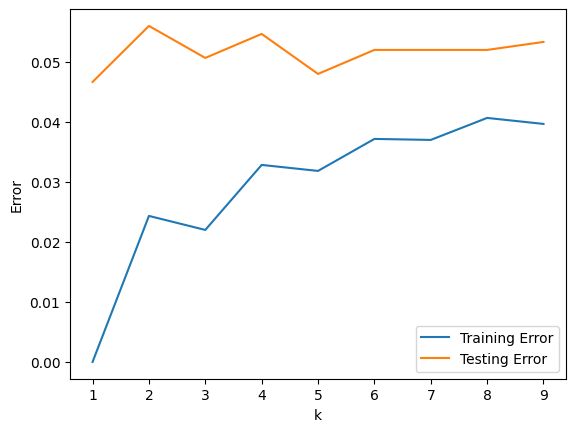

In [415]:
# plot training and testing error for different k values on the same plot
plt.plot(range(1, 10), train_error, label='Training Error')
plt.plot(range(1, 10), test_error, label='Testing Error')
plt.xlabel('k')
plt.ylabel('Error')
plt.legend()
plt.show()

### Choice of best k

In [416]:
from sklearn.model_selection import GridSearchCV

# KNN model
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 10)}
knn_gscv = GridSearchCV(knn, param_grid, cv=5)
knn_gscv.fit(X_train_1D, Y_train)
print(knn_gscv.best_params_)
# check score for best k
print("Error of KNN in training : ",1-knn_gscv.best_score_)
# test the best k on test data
Y_test_pred = knn_gscv.predict(X_test_1D)
print("Error of KNN on test data is : ",1-accuracy_score(Y_test, Y_test_pred))

{'n_neighbors': 3}
Error of KNN in training :  0.04616666666666658
Error of KNN on test data is :  0.05066666666666664


### Question 7 : MLP 

In [417]:
# compute number of parameters
number_of_parameters = 28*28*32 + 32 + 32*3 + 3
print("Number of parameters: ", number_of_parameters)
# transform labels in one hot encording depending on the label index(0 if between 0 and 2000, 1 if between 2000 and 4000, 2 if between 4000 and 6000)
Y_train_one_hot = np.zeros((len(Y_train), 3))
Y_test_one_hot = np.zeros((len(Y_test), 3))
Y_train_one_hot[0:2000,:] = [1,0,0]
Y_train_one_hot[2000:4000,:] = [0,1,0]
Y_train_one_hot[4000:,:] = [0,0,1]
Y_test_one_hot[0:250,:] = [1,0,0]
Y_test_one_hot[250:500,:] = [0,1,0]
Y_test_one_hot[500:750,:] = [0,0,1]

# implement the neural network using tensorflow 
from keras import Sequential
from keras.layers import Dense
# model by adding reLU activation function to the hidden layer
def build_model():
    model = Sequential()
    model.add(Dense(32, activation='relu', input_shape=(28*28,)))
    model.add(Dense(3, activation='softmax')) 
    return model

# use it on the training data and report empirical training error(0-1 loss) and testing error(0-1 loss)
model = build_model()
model.compile(optimizer='sgd', loss= 'categorical_crossentropy')
model.fit(X_train, Y_train_one_hot, epochs=20, batch_size=16, verbose=1)
train_prediction = model.predict(X_train)
train_prediction = np.argmax(train_prediction, axis=1)
test_prediction = model.predict(X_test)
test_prediction = np.argmax(test_prediction, axis=1)
# compute train and test error
train_error = 0
test_error = 0
for i in range(len(train_prediction)):
    if (train_prediction[i] == 0 and Y_train_one_hot[i][0] != 1) or (train_prediction[i] != 0 and Y_train_one_hot[i][0] == 1) : # we penalize only if first class was not correctly predicted
        train_error += 1
for i in range(len(test_prediction)):
    if (test_prediction[i] == 0 and Y_test_one_hot[i][0] != 1) or (test_prediction[i] != 0 and Y_test_one_hot[i][0] == 1) :
        test_error += 1
print("Training error: ", train_error/len(train_prediction))
print("Testing error: ", test_error/len(test_prediction))


Number of parameters:  25219
Epoch 1/20
375/375 [==============================] - 1s 1ms/step - loss: 0.3338
Epoch 2/20
375/375 [==============================] - 0s 1ms/step - loss: 0.2181
Epoch 3/20
375/375 [==============================] - 0s 1ms/step - loss: 0.2004
Epoch 4/20
375/375 [==============================] - 0s 1ms/step - loss: 0.1881
Epoch 5/20
375/375 [==============================] - 0s 1ms/step - loss: 0.1785
Epoch 6/20
375/375 [==============================] - 1s 2ms/step - loss: 0.1723
Epoch 7/20
375/375 [==============================] - 1s 1ms/step - loss: 0.1653
Epoch 8/20
375/375 [==============================] - 0s 1ms/step - loss: 0.1592
Epoch 9/20
375/375 [==============================] - 0s 1ms/step - loss: 0.1546
Epoch 10/20
375/375 [==============================] - 0s 1ms/step - loss: 0.1498
Epoch 11/20
375/375 [==============================] - 0s 1ms/step - loss: 0.1453
Epoch 12/20
375/375 [==============================] - 1s 1ms/step - loss: 0.1